In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
# personally made imports


# typical imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# modeling methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt

#clean look
import warnings
warnings.filterwarnings("ignore")

# Acquire

In [3]:
lake = pd.read_csv('Lake_Bilancino.csv')

In [4]:
lake.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [5]:
lake

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [6]:
lake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [7]:
lake.Date = pd.to_datetime(lake.Date, infer_datetime_format= True)

In [8]:
lake.duplicated('Date').sum()

0

In [9]:
lake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6603 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6026 non-null   float64       
 2   Rainfall_Mangona      6026 non-null   float64       
 3   Rainfall_S_Agata      6026 non-null   float64       
 4   Rainfall_Cavallina    6026 non-null   float64       
 5   Rainfall_Le_Croci     6026 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6603 non-null   float64       
 8   Flow_Rate             6582 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 464.4 KB


# Prepare

In [10]:
lake.set_index('Date', inplace = True)

In [11]:
lake.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 2002-03-06 to 2020-06-30
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      6026 non-null   float64
 1   Rainfall_Mangona      6026 non-null   float64
 2   Rainfall_S_Agata      6026 non-null   float64
 3   Rainfall_Cavallina    6026 non-null   float64
 4   Rainfall_Le_Croci     6026 non-null   float64
 5   Temperature_Le_Croci  6025 non-null   float64
 6   Lake_Level            6603 non-null   float64
 7   Flow_Rate             6582 non-null   float64
dtypes: float64(8)
memory usage: 464.3 KB


In [12]:
lake.shape

(6603, 8)

In [13]:
lake.isnull().mean()

Rainfall_S_Piero        0.087385
Rainfall_Mangona        0.087385
Rainfall_S_Agata        0.087385
Rainfall_Cavallina      0.087385
Rainfall_Le_Croci       0.087385
Temperature_Le_Croci    0.087536
Lake_Level              0.000000
Flow_Rate               0.003180
dtype: float64

<AxesSubplot:>

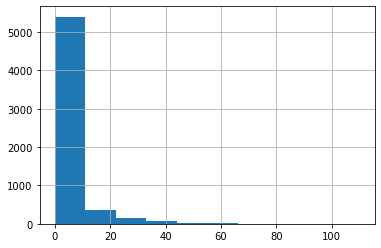

In [14]:
lake.Rainfall_Mangona.hist()

In [15]:
lake.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


# Nulls

- Only the target variable has no nulls
- rolling averages for flow rate
- Holt's linear model for the seasonal nulls

In [16]:
col = lake.columns

In [17]:
cat_col = lake.columns

Rainfall_S_Piero


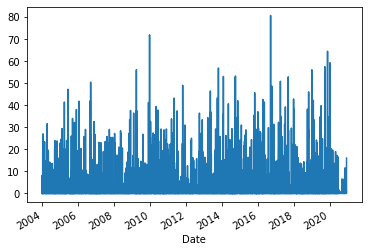

Rainfall_Mangona


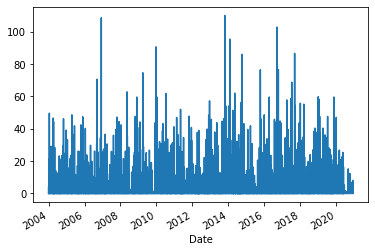

Rainfall_S_Agata


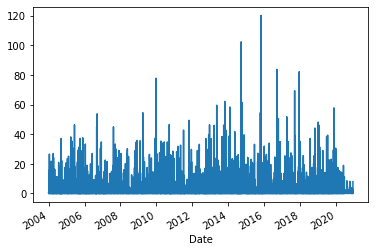

Rainfall_Cavallina


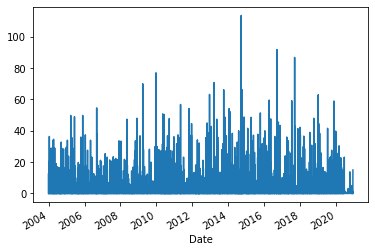

Rainfall_Le_Croci


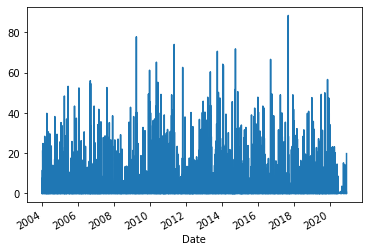

Temperature_Le_Croci


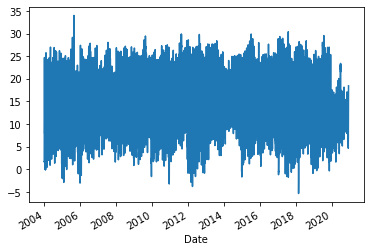

Lake_Level


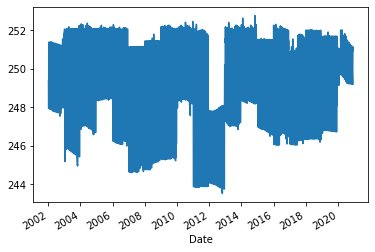

Flow_Rate


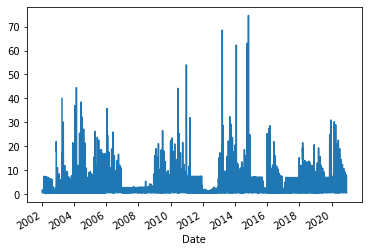

In [18]:
for col in lake.columns:
    print(col)
    lake[col].plot(kind = 'line')
    plt.show()

In [19]:
# i had some issues with plt (see cell 28) so I switched to sns for most future graphs

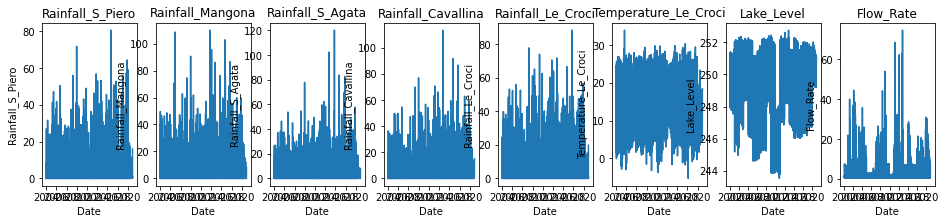

In [20]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(1,l,plot_number)

    # Title with column name.
    plt.title(col)

    sns.lineplot(x = lake.index, y = lake[col])

# Monthly

In [21]:
lake_l = lake.resample('M').mean()

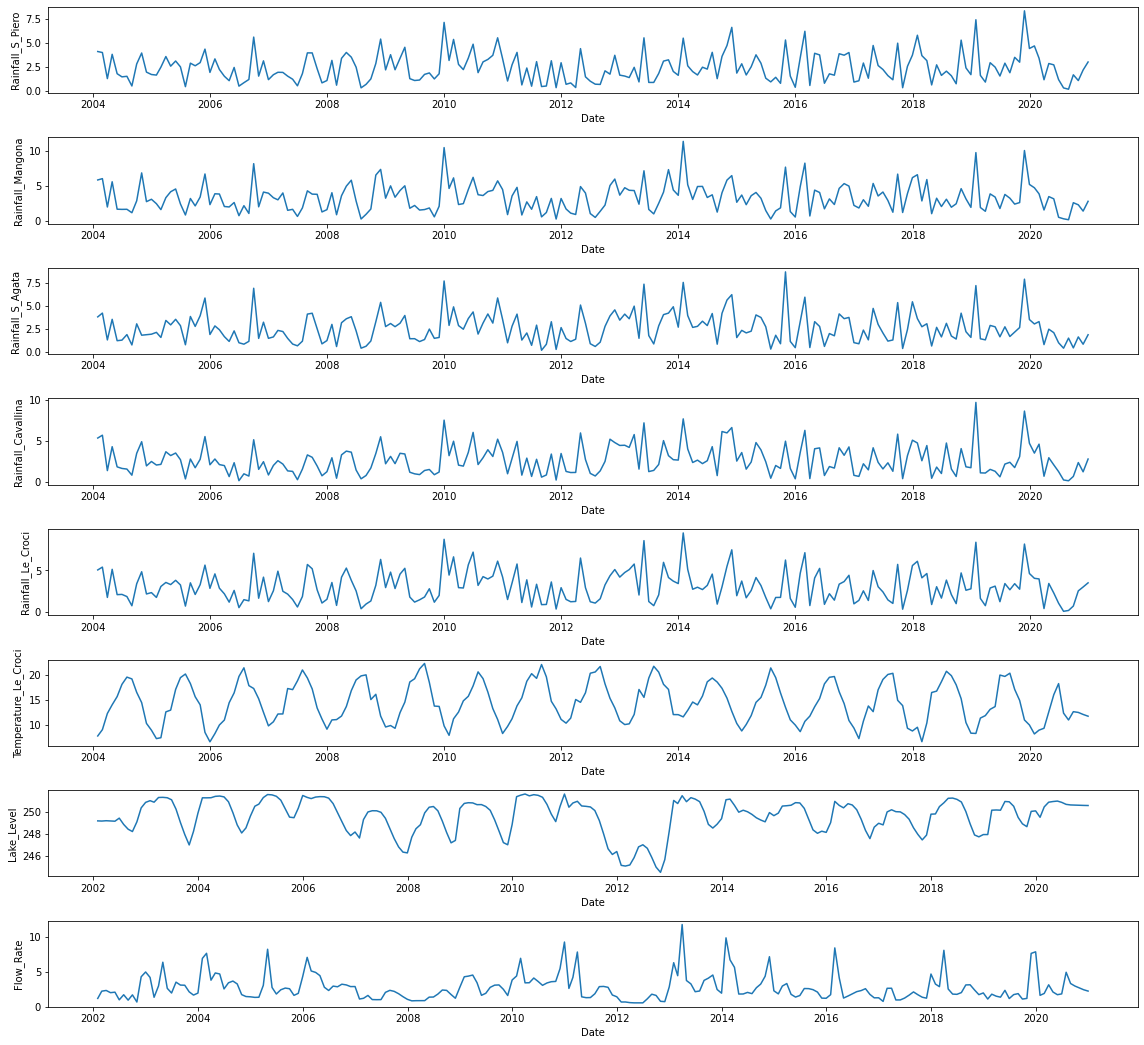

In [23]:
plt.figure(figsize=(16, 16))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(9,1,plot_number)

    # Title with column name.
    #plt.title(col)

    sns.lineplot(x = lake_l.index, y = lake_l[col])
    
    #ax[i].axvline(x=x,ymin=0,ymax=1.2,c="red",linewidth=2, zorder=0,clip_on=False)
    
plt.tight_layout()

# rolling 3 mean

In [24]:
lake_l = lake.rolling(3).mean()

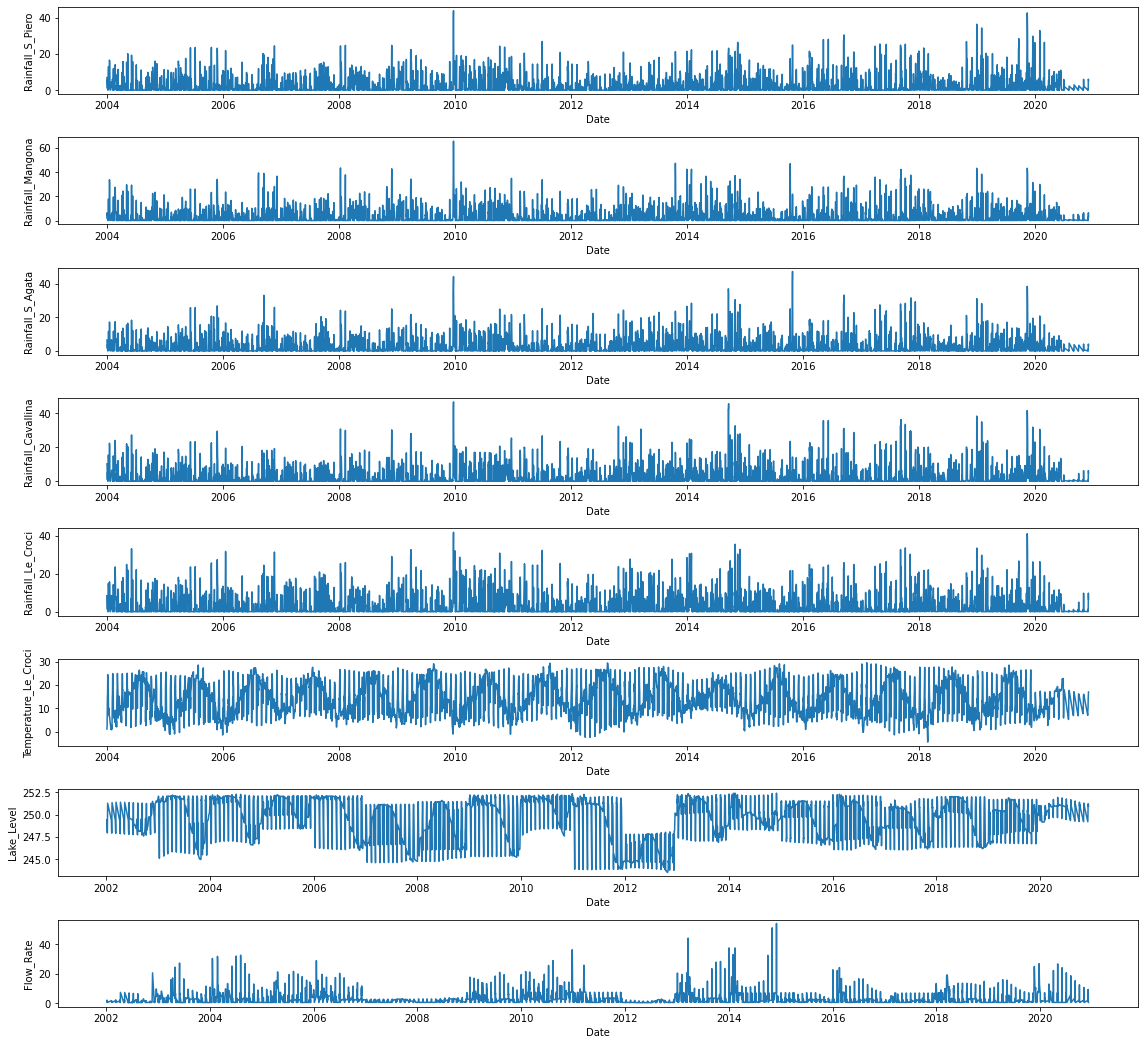

In [25]:
plt.figure(figsize=(16, 16))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(9,1,plot_number)

    # Title with column name.
    #plt.title(col)

    sns.lineplot(x = lake_l.index, y = lake_l[col])
    
plt.tight_layout()

# rolling 11 mean

In [26]:
lake_l = lake.rolling(15).mean()

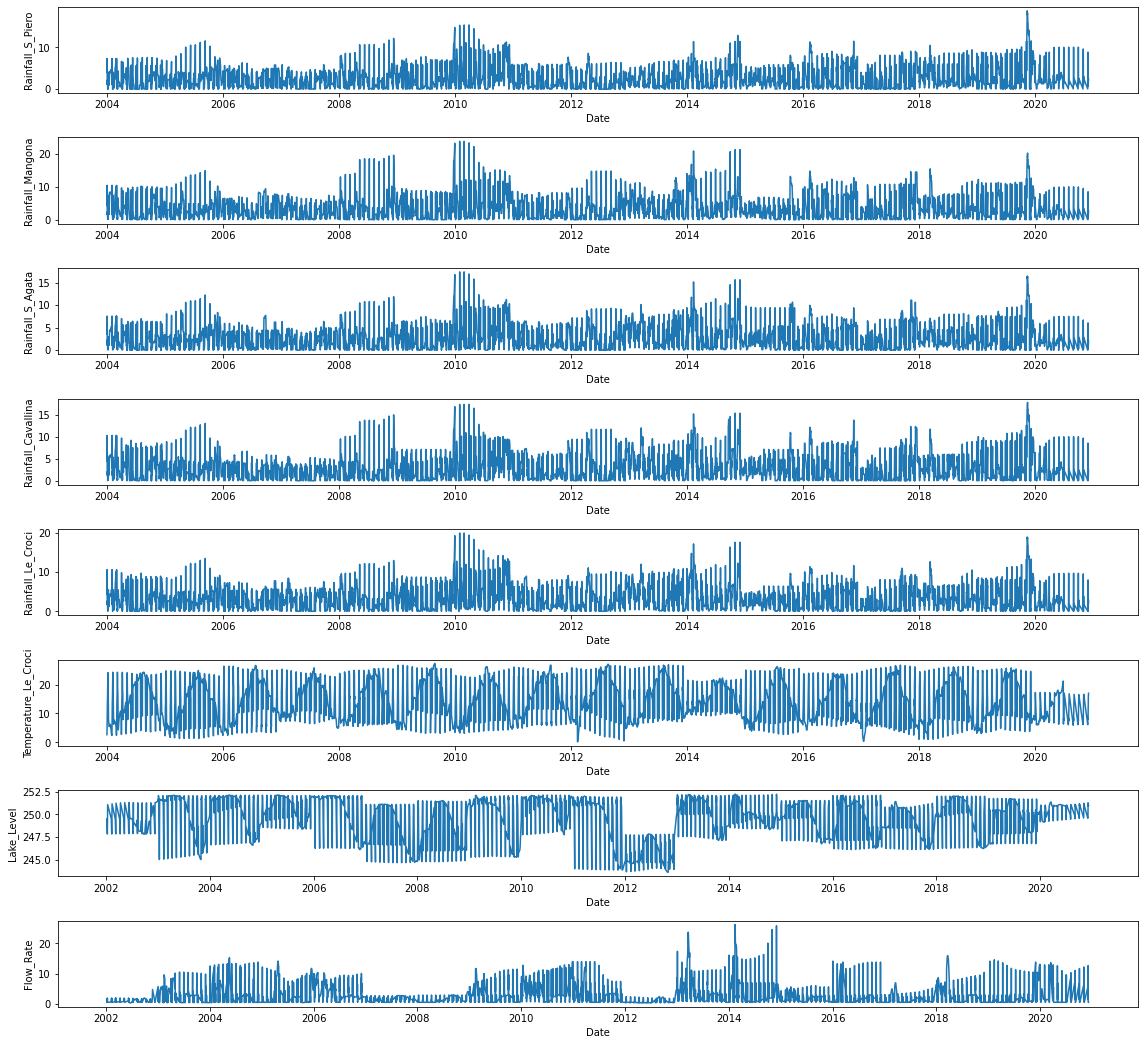

In [27]:
plt.figure(figsize=(16, 16))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(9,1,plot_number)

    # Title with column name.
    #plt.title(col)

    sns.lineplot(x = lake_l.index, y = lake_l[col])
    
plt.tight_layout()

# ????

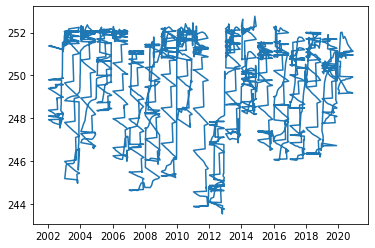

In [28]:
plt.plot(lake.Lake_Level)

# Looking like duplicates and nonsense

In [29]:
lake.duplicated()

Date
2002-03-06    False
2002-04-06     True
2002-05-06     True
2002-06-06     True
2002-07-06    False
              ...  
2020-06-26    False
2020-06-27    False
2020-06-28    False
2020-06-29    False
2020-06-30    False
Length: 6603, dtype: bool

In [30]:
lake[lake.duplicated()]

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-12-06,NaN,NaN,NaN,NaN,NaN,NaN,249.57,0.48
2002-06-13,NaN,NaN,NaN,NaN,NaN,NaN,249.57,0.48
...,...,...,...,...,...,...,...,...
2008-02-03,0.0,0.0,0.0,0.0,0.0,11.00,248.25,0.60
2011-12-30,0.0,0.0,0.0,0.0,0.0,6.30,244.77,0.60
2016-06-22,0.0,0.0,0.0,0.0,0.0,22.25,251.36,1.00


In [31]:
lake[lake.index == '2002-06-06']

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31


In [32]:
lake[lake.Lake_Level == 249.43]

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-30,NaN,NaN,NaN,NaN,NaN,NaN,249.43,1.70
2005-03-09,0.0,0.0,0.0,0.2,0.8,25.10,249.43,2.50
2006-08-28,0.2,0.0,0.0,0.0,0.0,19.60,249.43,2.50
2008-03-31,0.0,0.0,0.0,0.0,0.0,14.65,249.43,0.60
2013-08-29,0.0,0.0,0.0,0.0,0.0,22.25,249.43,3.50


In [33]:
lake.shape

(6603, 8)

In [34]:
lake_dup = lake.drop_duplicates()

In [35]:
lake_dup.shape

(6523, 8)

In [36]:
lake_dup[lake_dup.index == '2002-06-06']

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,


# Takeaway

I think the columns are identicle, but the index is not. so there are simply some days that simply have the same attributes


In [38]:
lake[lake.index > '2004-12-31']

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2005-01-01,0.0,0.0,0.0,0.0,0.0,6.20,249.84,0.6
2005-02-01,0.0,0.0,0.0,0.0,0.0,6.30,249.88,0.6
2005-03-01,0.2,0.0,0.0,0.0,0.0,4.40,249.90,0.6
2005-04-01,0.0,0.0,0.0,0.0,0.0,5.05,249.91,0.6
2005-05-01,0.0,0.0,0.0,0.0,0.0,4.80,249.93,0.6
...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
2020-06-27,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
2020-06-28,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6


In [43]:
lake_s = lake[lake.index > '2004-12-31']

In [42]:
lake_s

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2005-01-01,0.0,0.0,0.0,0.0,0.0,6.20,249.84,0.6
2005-02-01,0.0,0.0,0.0,0.0,0.0,6.30,249.88,0.6
2005-03-01,0.2,0.0,0.0,0.0,0.0,4.40,249.90,0.6
2005-04-01,0.0,0.0,0.0,0.0,0.0,5.05,249.91,0.6
2005-05-01,0.0,0.0,0.0,0.0,0.0,4.80,249.93,0.6
...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
2020-06-27,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
2020-06-28,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6


In [44]:
lake_sr = lake_s.resample('M').mean()

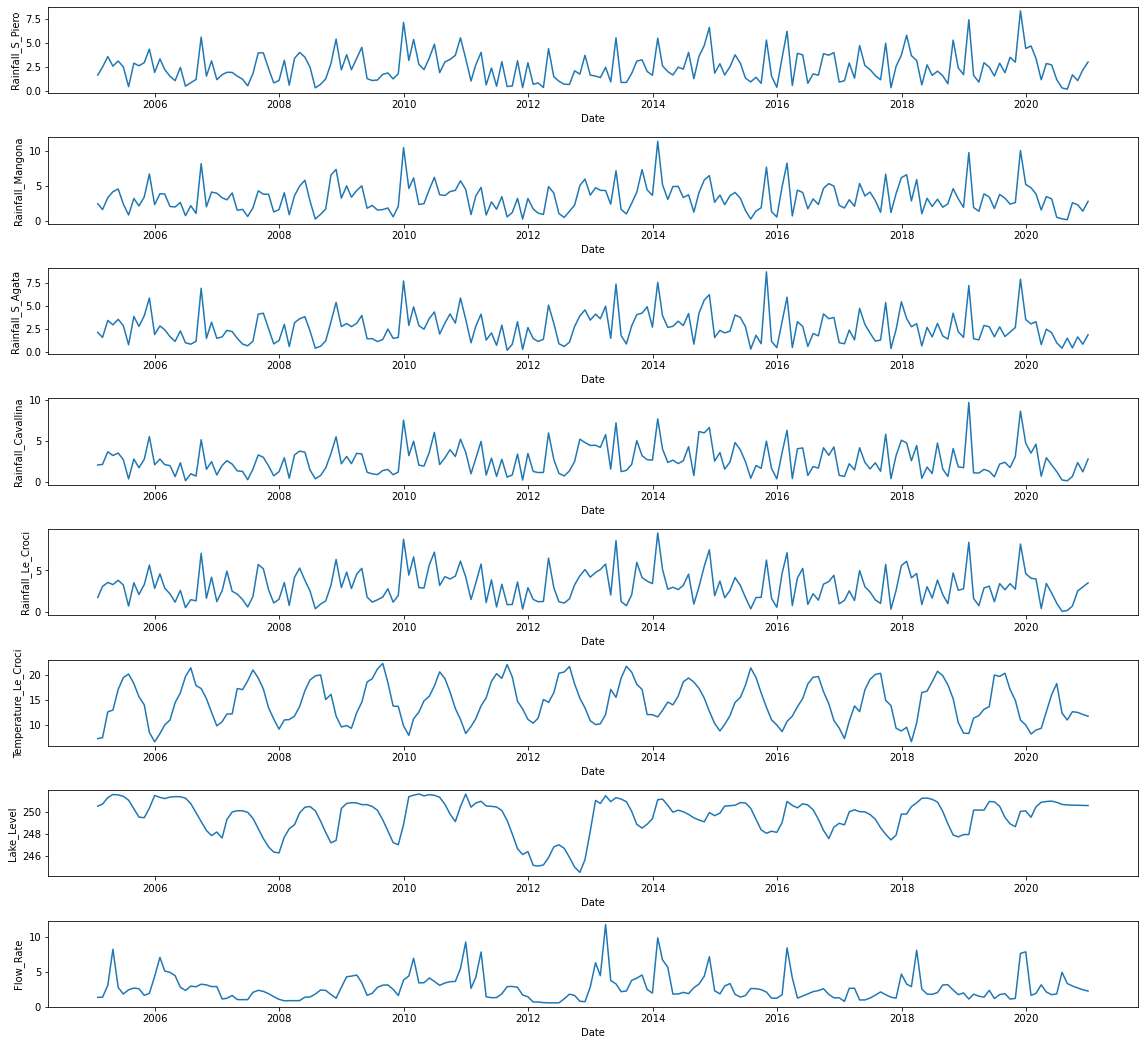

In [46]:
plt.figure(figsize=(16, 16))

for i, col in enumerate(cat_col):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1

    l= len(cat_col)

    plt.subplot(9,1,plot_number)

    # Title with column name.
    #plt.title(col)

    sns.lineplot(x = lake_sr.index, y = lake_sr[col])
    
    #ax[i].axvline(x=x,ymin=0,ymax=1.2,c="red",linewidth=2, zorder=0,clip_on=False)
    
plt.tight_layout()

# Takeaway II
use sns not plt since sns allows you to explicitly state x and y axis

# ---------------------------------------------------------------------------------

# ---------------------------------------------------------------------------------

# Convert to py functions

In [47]:
def acquire(df):
    pd.read_csv(df)
    return df

In [48]:
def prepare(df):
    df.Date = pd.to_datetime(df.Date, infer_datetime_format= True)
    df.set_index('Date', inplace = True)
    df = df[df.index > '2004-12-31']
    df = df.sort_index()
    return df

# Move to the Explore Phase

In [ ]:
# Thinking of modeling

Holt-Winters is a way to model three aspects of the time series: a typical value (average), a slope (trend) over time, and a cyclical repeating pattern (seasonality).